**Sumber Dataset: https://www.kaggle.com/hendratno/covid19-indonesia**

**Dataset Name:** COVID-19 Indonesia Dataset

**Main Attribute Dataset Information:**
1. Date = Reporting Date
2. New Cases = New daily positive cases
3. New Deaths = New daily deaths
4. New Recovered = New daily recovered
5. New Active Cases = New daily active cases
6. Total Cases = Total positive cases until the related date
7. Total Deaths = Total deaths until the related date
8. Total Recovered = Total recovered until the related date
9. Total Active Cases = Total active cases until the related date

# **Week 1 - Intoduction**

In [1]:
# Install mglearn packages
!pip install mglearn

In [2]:
# import library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import mglearn
import datetime as dt

In [3]:
# connect to google drive

# from google.colab import drive
# drive.mount('/content/drive')

# path = '/content/drive/My Drive/Colab Notebooks/Machine Learning Class/Tugas Sebelum UTS/Numerical Data - Covid 19/'

path = ''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Baca dan load dataset Covid 19

dataset = pd.read_csv(path + 'covid_19_indonesia_time_series_all.csv')
# convert feature Date dari string ke object date
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.00
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-JB,Jawa Barat,3,0,0,3,12,5,135,-128,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1125.00%,NaN,NaN
4,2020-03-02,ID-RI,Riau,1,0,0,1,2,1,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,2021-01-21,ID-SG,Sulawesi Tenggara,77,1,1,75,9016,172,7392,1452,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,29.22,3421.03,0.38,65.26,1.91%,81.99%,1.97,NaN
10690,2021-01-21,ID-SA,Sulawesi Utara,92,2,83,7,11931,361,8497,3073,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,34.82,4516.10,0.76,136.64,3.03%,71.22%,0.39,1.00
10691,2021-01-21,ID-SB,Sumatera Barat,181,4,49,128,26091,577,18591,6923,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,32.79,4727.28,0.72,104.54,2.21%,71.25%,1.08,0.57
10692,2021-01-21,ID-SS,Sumatera Selatan,101,6,49,46,13437,652,10834,1951,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,12.29,1635.16,0.73,79.34,4.85%,80.63%,0.92,6.00


In [5]:
# Ambil beberapa feature penting yang akan digunakan untuk perhitungan dan prediksi

dataset = dataset[['Date', 'New Cases', 'New Deaths', 'New Recovered',	'New Active Cases',	'Total Cases', 'Total Deaths', 'Total Recovered',	'Total Active Cases']]

In [6]:
# Ubah object date menjadi data ordinal berupa integer guna memudahkan proses selanjutnya

dataset['Date'] = dataset['Date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Lihat 5 data pertama dari dataset

dataset.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,737485,2,0,0,2,489,20,39,430
1,737486,2,0,0,2,491,20,39,432
2,737486,2,0,0,2,2,0,0,2
3,737486,3,0,0,3,12,5,135,-128
4,737486,1,0,0,1,2,1,1,0


In [8]:
# Lihat 5 data terakhir dari dataset

dataset.tail()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
10689,737811,77,1,1,75,9016,172,7392,1452
10690,737811,92,2,83,7,11931,361,8497,3073
10691,737811,181,4,49,128,26091,577,18591,6923
10692,737811,101,6,49,46,13437,652,10834,1951
10693,737811,83,1,80,2,19962,719,17228,2015


In [9]:
# Import train_test_split guna membagi dataset menjadi data training dan data test
from sklearn.model_selection import train_test_split

# Total case akan digunakan sebagai target data
# variabel data akan menampung attribute dan variabel target akan menampung feature target yang akan diprediksi
data = dataset.copy().drop(['Total Cases'], axis=1)
target = dataset['Total Cases']
# Ubah data dan target ke tipe data numpy array
X = data.to_numpy()
y = target.to_numpy()

# Bagi data menjadi training dan test set dengan ukuran 80% training dan 20% test set, dengan random state 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cetak ukuran dari data hasil pembagian yaitu 'X_train', 'y_train', 'X_test', 'y_test'
print("Shape X_train : {}".format(X_train.shape))
print("Shape y_train : {}".format(y_train.shape))
print("Shape X_test : {}".format(X_test.shape))
print("Shape y_test : {}".format(y_test.shape))

Shape X_train : (8555, 8)
Shape y_train : (8555,)
Shape X_test : (2139, 8)
Shape y_test : (2139,)


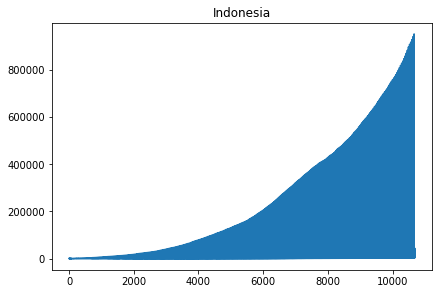

In [10]:
# Plotting grafik pertumbuhan total case di Indonesia berdasarkan tanggal
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
target.plot(ax=plt.gca(), title='Indonesia')

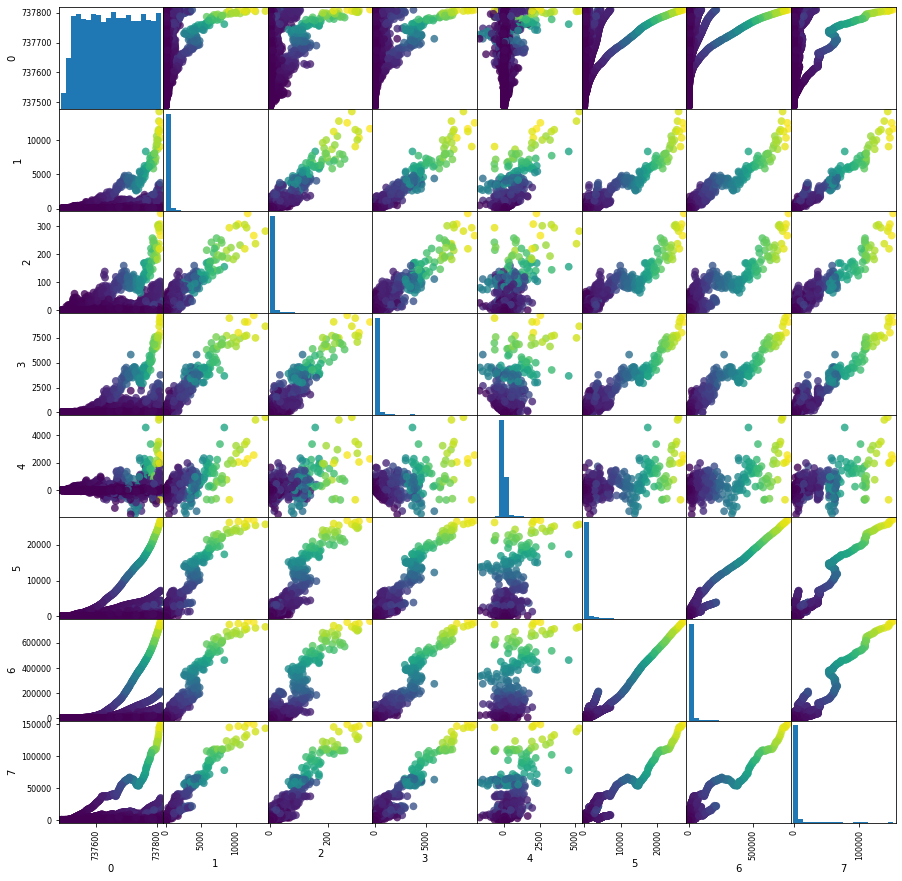

In [11]:
# Visualisasi plotting scatter matrix dari semua attribute data

dataframe = pd.DataFrame(X_train)
gr = pd.plotting.scatter_matrix(dataframe,
                                c=y_train,
                                figsize=(15,15),
                                marker='o',
                                hist_kwds={'bins': 20},
                                s=60,
                                alpha=.8)

In [12]:
# Import library KNN Classifier untuk memprediksi berdasarkan tetangga terdekat
from sklearn.neighbors import KNeighborsClassifier

# Bangun model KNN dengan neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)
# Terapkan model KNN pada training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
# Membuat dummy data baru guna dilakukan prediksi
x_baru = np.array([[737850, 86, 3, 60, 3, 700, 17500, 2050]])

# Cetak ukuran data baru
print(x_baru.shape)

(1, 8)


In [14]:
# Prediksi data dummy baru dengan model KNN yang dibangun
prediksi = knn.predict(x_baru)

# Cetak hasil prediksi total case dari dummy data baru
print("Prediksi {}".format(prediksi))

Prediksi [19938]


In [15]:
# Prediksi data test set dengan model KNN yang dibangun
y_pred = knn.predict(X_test)

# Cetak hasil prediksi total case dari data test set
print("Prediksi dengan data uji : \n {}".format(y_pred))

Prediksi dengan data uji : 
 [ 1376   432  1067 ... 12403  7975  1463]


In [16]:
# Cetak hasil akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.142


**In this week, we can conclude that K Nearest Neighbors with K = 1 is a bad model for predict COVID 19 Total Case in Indonesia**

# **Week 2 - Data Preprocessing**

## **Handling Missing Value**

In [17]:
# Cek missing value pada data set
dataset.isnull()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10689,False,False,False,False,False,False,False,False,False
10690,False,False,False,False,False,False,False,False,False
10691,False,False,False,False,False,False,False,False,False
10692,False,False,False,False,False,False,False,False,False


In [18]:
# Cek jumlah total missing value pada setiap feature atau kolom
dataset.isnull().sum()

Date                  0
New Cases             0
New Deaths            0
New Recovered         0
New Active Cases      0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
dtype: int64

**Because no missing value in our dataset, we dont need to use dropna and fillna.
So, here we comment this code**

In [19]:
## Handle missing value dengan drop data atau isi cell kosong, tetapi pada dataset ini tidak terdapat missing value

# dataset.dropna(axis=0)
# dataset.dropna(axis=1)
# dataset.dropna(how='all')
# dataset.dropna(thresh=11)
# dataset.dropna(subset=['Date'])

## Fill missing value with mean
# dataset = dataset.fillna(dataset.mean())

# dataset.values

In [20]:
# Lihat 5 data pertama dari dataset
dataset.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,737485,2,0,0,2,489,20,39,430
1,737486,2,0,0,2,491,20,39,432
2,737486,2,0,0,2,2,0,0,2
3,737486,3,0,0,3,12,5,135,-128
4,737486,1,0,0,1,2,1,1,0


In [21]:
# Lihat 5 data terakhir dari dataset
dataset.tail()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
10689,737811,77,1,1,75,9016,172,7392,1452
10690,737811,92,2,83,7,11931,361,8497,3073
10691,737811,181,4,49,128,26091,577,18591,6923
10692,737811,101,6,49,46,13437,652,10834,1951
10693,737811,83,1,80,2,19962,719,17228,2015


## **Data Normalization**

### **Min Max Normalization**

In [22]:
# Import library Min Max Scaler untuk normalization
from sklearn.preprocessing import MinMaxScaler

# Lakukan proses Min Max Normalization untuk data X (attribute)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# Cetak ukuran dimensi dari data hasil normalisasi
print("Shape X_train_norm : {}".format(X_train_norm.shape))
print("Shape X_test_norm : {}".format(X_test_norm.shape))

Shape X_train_norm : (8555, 8)
Shape X_test_norm : (2139, 8)


In [23]:
# Cetak data X_train setelah dilakukan normalisasi
X_train_norm

array([[3.34355828e-01, 1.40607424e-04, 0.00000000e+00, ...,
        4.77888468e-04, 1.69515651e-04, 1.02117455e-03],
       [1.07361963e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.56468976e-04],
       [3.34355828e-01, 5.62429696e-04, 0.00000000e+00, ...,
        1.83803257e-04, 4.05025945e-04, 1.41646792e-03],
       ...,
       [3.49693252e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.10281954e-04, 1.68221638e-04, 1.44282081e-03],
       [9.26380368e-01, 5.69460067e-03, 1.15606936e-02, ...,
        2.10638533e-02, 2.92395088e-02, 1.02644513e-02],
       [3.03680982e-01, 7.03037120e-05, 0.00000000e+00, ...,
        5.88170422e-04, 1.63045588e-04, 1.40329148e-03]])

In [24]:
# Cetak data X_test setelah dilakukan normalisasi
X_test_norm

array([[5.38699690e-01, 5.05722651e-03, 0.00000000e+00, ...,
        1.09117891e-03, 1.44108227e-03, 4.94488046e-03],
       [1.57894737e-01, 2.92786798e-03, 0.00000000e+00, ...,
        1.48400332e-03, 1.26740134e-04, 3.90146532e-03],
       [3.34365325e-01, 3.85946234e-03, 5.64971751e-03, ...,
        1.92047488e-03, 1.14066121e-03, 3.66556276e-03],
       ...,
       [8.76160991e-01, 6.92041522e-03, 0.00000000e+00, ...,
        6.19789621e-03, 9.13467782e-03, 5.98920292e-02],
       [7.95665635e-01, 2.79478307e-03, 0.00000000e+00, ...,
        1.27886168e-02, 9.72143770e-03, 1.40815678e-02],
       [2.63157895e-01, 5.98882087e-03, 0.00000000e+00, ...,
        2.88071232e-03, 8.15205061e-04, 8.71932133e-03]])

### **Standard Normalization**

In [25]:
# Import Library Standard Scaler untuk normalization
from sklearn.preprocessing import StandardScaler

# Lakukan proses Standard Normalization untuk data X (attribute)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# Cetak ukuran dimensi data hasil normalisasi
print("Shape X_train_std : {}".format(X_train_std.shape))
print("Shape X_test_std : {}".format(X_test_std.shape))

Shape X_train_std : (8555, 8)
Shape X_test_std : (2139, 8)


In [26]:
# Cetak data X_train setelah dilakukan normalisasi
X_train_std

array([[-0.71887296, -0.24003572, -0.25657706, ..., -0.23944342,
        -0.21526239, -0.26836372],
       [-1.55452188, -0.24261559, -0.25657706, ..., -0.24557259,
        -0.21764246, -0.27071226],
       [-0.71887296, -0.23229611, -0.25657706, ..., -0.24321522,
        -0.21195573, -0.26272721],
       ...,
       [-0.6624102 , -0.24261559, -0.25657706, ..., -0.24415817,
        -0.21528056, -0.26235145],
       [ 1.46058975, -0.13813085, -0.06285496, ...,  0.02458213,
         0.19289208, -0.13656348],
       [-0.83179849, -0.24132565, -0.25657706, ..., -0.238029  ,
        -0.21535323, -0.2629151 ]])

In [27]:
# Cetak data X_test setelah dilakukan normalisasi
X_test_std

array([[-0.00156317, -0.2038174 , -0.29272795, ..., -0.25637841,
        -0.21967039, -0.24628356],
       [-1.39568322, -0.23667473, -0.29272795, ..., -0.2503399 ,
        -0.24245367, -0.26200452],
       [-0.74962759, -0.22229965, -0.21762358, ..., -0.24363045,
        -0.22487799, -0.26555882],
       ...,
       [ 1.23387655, -0.17506724, -0.29272795, ..., -0.17787786,
        -0.08630684,  0.58159574],
       [ 0.9391845 , -0.23872832, -0.29272795, ..., -0.07656519,
        -0.07613573, -0.10862266],
       [-1.0103167 , -0.18944232, -0.29272795, ..., -0.22886967,
        -0.23051957, -0.18941471]])

# **Week 3 - Data Representation and Feature Engineering**

In [28]:
# Melihat informasi missing value dan tipe data pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10694 entries, 0 to 10693
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                10694 non-null  int64
 1   New Cases           10694 non-null  int64
 2   New Deaths          10694 non-null  int64
 3   New Recovered       10694 non-null  int64
 4   New Active Cases    10694 non-null  int64
 5   Total Cases         10694 non-null  int64
 6   Total Deaths        10694 non-null  int64
 7   Total Recovered     10694 non-null  int64
 8   Total Active Cases  10694 non-null  int64
dtypes: int64(9)
memory usage: 752.0 KB


In [29]:
# Melihat informasi deskripsi dari dataset
dataset.describe()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
count,10694.000000,10694.000000,10694.000000,10694.000000,10694.000000,10694.000000,10694.000000,10694.000000,10694.000000
mean,737658.554891,177.915841,5.017767,142.598092,30.299981,14636.442772,498.109875,11387.265289,2751.067608
std,88.511051,727.096764,19.413332,598.826355,200.531050,63454.925418,2011.373037,51933.115819,10071.339041
min,737485.000000,0.000000,0.000000,0.000000,-1762.000000,1.000000,0.000000,0.000000,-128.000000
25%,737582.000000,3.000000,0.000000,0.000000,-2.000000,246.000000,7.000000,138.000000,81.000000
50%,737659.000000,22.000000,0.000000,10.000000,2.000000,1765.500000,53.000000,996.000000,480.500000
75%,737735.000000,83.000000,2.000000,55.000000,26.000000,7056.750000,236.000000,4712.750000,1632.750000
max,737811.000000,14224.000000,346.000000,9755.000000,5279.000000,951651.000000,27203.000000,772790.000000,151658.000000


**Because no missing value in our dataset, we dont need to use Simple Imputer, here we comment this code**

In [30]:
# from sklearn.impute import SimpleImputer

# imr = SimpleImputer(missing_values=np.nan, strategy='mean') # mean di setiap kolom
# imr = imr.fit(dataset.values)
# data_imputed = imr.transform(dataset.values)
# data_imputed

# **Week 4 - Supervised Learning I**

## **Linear Regression**

In [31]:
# Cetak ukuran dari X_train
X_train.shape

(8555, 8)

In [32]:
# Cetak ukuran dari X_test
X_test.shape

(2139, 8)

**Linear Regression with Default Dataset**

In [33]:
# Import library linear regression
from sklearn.linear_model import LinearRegression

# Bangun model Linear Regression dan terapkan model pada training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Cetak akurasi dari training dan test set
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Linear regression without normalization cause to overfitting with the result

**Linear Regression with Min Max Normalization on Dataset**

In [34]:
# Bangun model linear regression dengan dataset yang sudah dilakukan Min Max Normalisasi
lr = LinearRegression()
# Terapkan model pada training set
lr.fit(X_train_norm, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = lr.predict(X_train_norm)
y_test_pred = lr.predict(X_test_norm)

# Cetak akurasi dari training dan test set
print("Accuracy on training set: {:.3f}".format(lr.score(X_train_norm, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test_norm, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.915


Linear regression with Min Max normalization can reduce the overfitting on test instance and produces a good accuracy results

**Linear Regression with Standard Normalization on Dataset**

In [35]:
# Bangun model linear regression dengan dataset yang sudah ilakukan Standard Normalisasi
lr = LinearRegression()
# Terapkan model pada training set
lr.fit(X_train_std, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

# Cetak akurasi model dari training dan test set
print("Accuracy on training set: {:.3f}".format(lr.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test_std, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


Linear regression with Standard normalization can reduce the overfitting on test instance, but the accuracy is lower than the model with Min Max Normalization

In [36]:
# Cetak 5 data pertama dari dataset
dataset.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,737485,2,0,0,2,489,20,39,430
1,737486,2,0,0,2,491,20,39,432
2,737486,2,0,0,2,2,0,0,2
3,737486,3,0,0,3,12,5,135,-128
4,737486,1,0,0,1,2,1,1,0


## **Decision Tree**

In [37]:
# Import library decision tree regressor dari tree
from sklearn.tree import DecisionTreeRegressor

# Lakukan pembagian dataset menjadi training dan test set dengan ukuran training 80% dan test set 20% dengan random state 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Decision Tree with Default Dataset**

In [38]:
# Bangun model decision tree regressor dengan maksimum kedalaman tree adalah 10
dtr = DecisionTreeRegressor(max_depth=10)

# Terapkan model pada training set
dtr.fit(X_train, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

# Cetak akurasi model dari training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.999


Decision Tree without normalization cause to overfitting with the result

**Decision Tree with Min Max Normalization on Dataset**

In [39]:
# Bangun model decision tree regressor dengan dataset yang sudah dilakukan Min Max Normalisasi
dtr = DecisionTreeRegressor(max_depth=10)

# Terapkan model pada training set
dtr.fit(X_train_norm, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train_norm)
y_test_pred = dtr.predict(X_test_norm)

# Cetak akurasi model dari training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train_norm, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test_norm, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.925


Decision Tree with Min Max normalization can reduce the overfitting on test instance and produces a good accuracy results

**Decision Tree with Standard Normalization on Dataset**

In [40]:
# Bangun model decision tree regressor dengan dataset yang sudah dilakukan Standard Normalisasi
dtr = DecisionTreeRegressor(max_depth=10)

# Terapkan model pada training set
dtr.fit(X_train_std, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train_std)
y_test_pred = dtr.predict(X_test_std)

# Cetak akurasi model dari training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test_std, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.829


Decision Tree with Min Max normalization can reduce the overfitting on test instance and produces a good accuracy results

## **Random Forests**

In [41]:
# Import library random forest regressor dan ensemble
from sklearn.ensemble import RandomForestRegressor

# Lakukan pembagian dataset menjadi training dan test set dengan ukuran training 80% dan test set 20% dengan random state 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**Random Forest with Default Dataset**

In [42]:
# Bangun model random forest regressor dengan random state 1234
model = RandomForestRegressor(random_state=1234)
# Terapkan model pada training set
model.fit(X_train, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test, y_test)))

Accuracy on training set: -176.245
Accuracy on test set: -153.798


Random Forest approach cause overfitting for this dataset

**Random Forest with Min Max Normalization on Dataset**

In [43]:
# Bangun model random forest regressor dengan menggunakan dataset yang telah dilakukan Min Max Normalisasi
model = RandomForestRegressor(random_state=1234)
# Terapkan model pada training set
model.fit(X_train_norm, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train_norm)
y_test_pred = dtr.predict(X_test_norm)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train_norm, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test_norm, y_test)))

Accuracy on training set: -0.008
Accuracy on test set: -0.000


Random Forest with Min Max Normalization approach cause underfitting for this dataset

**Random Forest with Standard Normalization on Dataset**

In [44]:
# Bangun model random forest regressor dengan menggunakan dataset yang telah dilakukan Standard Normalisasi
model = RandomForestRegressor(random_state=1234)
# Terapkan model pada training set
model.fit(X_train_std, y_train)

# Prediksi data train dan test set dari model yang dibangun
y_train_pred = dtr.predict(X_train_std)
y_test_pred = dtr.predict(X_test_std)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(dtr.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(dtr.score(X_test_std, y_test)))

Accuracy on training set: -1.162
Accuracy on test set: -0.849


Random Forest with Min Max Normalization approach cause underfitting for this dataset

# **Week 5 - Supervised Learning II**

## **K-Nearest Neighbors**

**KNN with Default Dataset**

In [45]:
# Import library KNN Regressor dari neighbors
from sklearn.neighbors import KNeighborsRegressor

# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy = []
test_accuracy = []
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)
# Buat variable untuk menampung hasil akurasi dan k yang optimal
highest_accuracy = 0
k_chosen = 0

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsRegressor dengan jumlah neighbors dynamic 1-30 dengan weights adalah distance
  clf = KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
  # Terapkan model pada training set
  clf.fit(X_train, y_train)
  # Simpan akurasi pada data training dan test set ke list
  training_accuracy.append(clf.score(X_train, y_train))
  test_score = clf.score(X_test, y_test)
  test_accuracy.append(test_score)

  # Simpan akurasi tertinggi dari percobaan menggunakan K = 1 sampai 30
  if (test_score > highest_accuracy):
    highest_accuracy = test_score
    k_chosen = neighbors
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: 0.999854
With K = 2, Test set accuracy: 0.999949
With K = 3, Test set accuracy: 0.999906
With K = 4, Test set accuracy: 0.999896
With K = 5, Test set accuracy: 0.999878
With K = 6, Test set accuracy: 0.999832
With K = 7, Test set accuracy: 0.999829
With K = 8, Test set accuracy: 0.999805
With K = 9, Test set accuracy: 0.999792
With K = 10, Test set accuracy: 0.999770
With K = 11, Test set accuracy: 0.999729
With K = 12, Test set accuracy: 0.999706
With K = 13, Test set accuracy: 0.999662
With K = 14, Test set accuracy: 0.999616
With K = 15, Test set accuracy: 0.999575
With K = 16, Test set accuracy: 0.999524
With K = 17, Test set accuracy: 0.999471
With K = 18, Test set accuracy: 0.999410
With K = 19, Test set accuracy: 0.999358
With K = 20, Test set accuracy: 0.999292
With K = 21, Test set accuracy: 0.999245
With K = 22, Test set accuracy: 0.999179
With K = 23, Test set accuracy: 0.999133
With K = 24, Test set accuracy: 0.999061
With K = 25, Test set acc

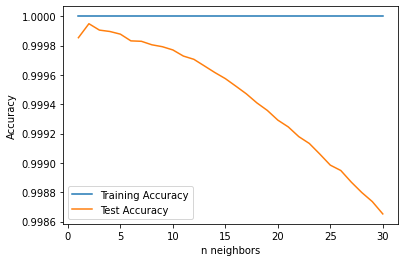

In [46]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

KNN with default dataset show a good accuration but maybe cause overfitting on the result

**KNN with Min Max Normalization**

In [47]:
# Lakukan percobaan KNN Regressor seperti sebelumnya dengan menggunakan dataset yang telah dilakukan Min Max Normalisasi

# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy_norm = []
test_accuracy_norm = []
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsRegressor dengan jumlah neighbors dynamic 1-30 dengan weights adalah distance
  clf = KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
  # Terapkan model pada training set
  clf.fit(X_train_norm, y_train)
  # Simpan akurasi pada data training dan test set ke list
  training_accuracy_norm.append(clf.score(X_train_norm, y_train))
  test_score = clf.score(X_test_norm, y_test)
  test_accuracy_norm.append(test_score)
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: -0.060903
With K = 2, Test set accuracy: -1.214894
With K = 3, Test set accuracy: -0.631223
With K = 4, Test set accuracy: -0.422189
With K = 5, Test set accuracy: -0.298980
With K = 6, Test set accuracy: -0.213518
With K = 7, Test set accuracy: -0.163336
With K = 8, Test set accuracy: -0.127980
With K = 9, Test set accuracy: -0.108268
With K = 10, Test set accuracy: -0.084791
With K = 11, Test set accuracy: -0.084254
With K = 12, Test set accuracy: -0.070777
With K = 13, Test set accuracy: -0.065107
With K = 14, Test set accuracy: -0.060265
With K = 15, Test set accuracy: -0.058313
With K = 16, Test set accuracy: -0.054510
With K = 17, Test set accuracy: -0.049712
With K = 18, Test set accuracy: -0.048270
With K = 19, Test set accuracy: -0.045151
With K = 20, Test set accuracy: -0.039532
With K = 21, Test set accuracy: -0.041247
With K = 22, Test set accuracy: -0.044162
With K = 23, Test set accuracy: -0.043180
With K = 24, Test set accuracy: -0.042762
W

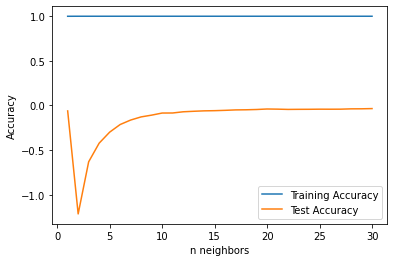

In [48]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy_norm, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy_norm, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

KNN with Min Max Normalization on dataset show a good enough accuration for test instance

**KNN with Standard Normalization**

In [49]:
# Lakukan percobaan KNN Regressor seperti sebelumnya dengan menggunakan dataset yang telah dilakukan Standard Normalisasi

# Buat variable list untuk menyimpan akurasi dari training dan test
training_accuracy_std = []
test_accuracy_std = []
# Buat neighbors setting dari 1-30 untuk dilakukan percobaan mencari akurasi yang optimal
neighbors_settings = range(1, 31)

# Lakukan looping percobaan menggunakan K = 1-30
for neighbors in neighbors_settings:
  # Bangun model KNeighborsRegressor dengan jumlah neighbors dynamic 1-30 dengan weights adalah distance
  clf = KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
  # Terapkan model pada training set
  clf.fit(X_train_std, y_train)
  # Simpan akurasi pada data training dan test set ke list
  training_accuracy_std.append(clf.score(X_train_std, y_train))
  test_score = clf.score(X_test_std, y_test)
  test_accuracy_std.append(test_score)
  # Cetak akurasi pada test set dan jumlah K
  print("With K = {:d}, Test set accuracy: {:f}".format(neighbors, test_score))

With K = 1, Test set accuracy: -0.949481
With K = 2, Test set accuracy: -0.541733
With K = 3, Test set accuracy: -0.373238
With K = 4, Test set accuracy: -0.277313
With K = 5, Test set accuracy: -0.211432
With K = 6, Test set accuracy: -0.167609
With K = 7, Test set accuracy: -0.134594
With K = 8, Test set accuracy: -0.114292
With K = 9, Test set accuracy: -0.103949
With K = 10, Test set accuracy: -0.099040
With K = 11, Test set accuracy: -0.091170
With K = 12, Test set accuracy: -0.084352
With K = 13, Test set accuracy: -0.070131
With K = 14, Test set accuracy: -0.066676
With K = 15, Test set accuracy: -0.063634
With K = 16, Test set accuracy: -0.061825
With K = 17, Test set accuracy: -0.058905
With K = 18, Test set accuracy: -0.056079
With K = 19, Test set accuracy: -0.049993
With K = 20, Test set accuracy: -0.048346
With K = 21, Test set accuracy: -0.041992
With K = 22, Test set accuracy: -0.040564
With K = 23, Test set accuracy: -0.037449
With K = 24, Test set accuracy: -0.037766
W

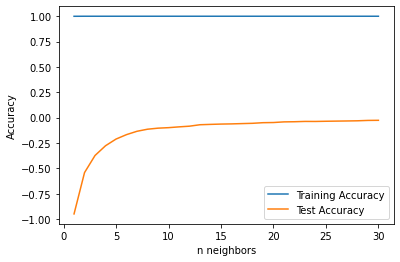

In [50]:
# Visualisasi plotting dari K = 1 sampai 30 dengan akurasi model pada test set
plt.plot(neighbors_settings, training_accuracy_std, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy_std, label="Test Accuracy")
# Berikan label pada plot x dan y
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

KNN with Standard Normalization on dataset show a good accuration on test instance than Min Max Normalization

# **Week 6 - Supervised Learning III**

## **Naive Bayes Classifier**

**Model Training**

In [51]:
# Import Gassian Naive Bayes dari naive bayes
from sklearn.naive_bayes import GaussianNB

# Bangun model GaussianNB
gnb = GaussianNB()

# Terapkan model pada training set
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
# Prediksi test set menggunakan model yang telah dibangun
y_pred = gnb.predict(X_test)
y_pred

array([2949,  244,  200, ..., 2188, 6528, 1347])

**Check Accuracy Score**

In [53]:
# Import library accuracy score metrics
from sklearn.metrics import accuracy_score

# Cetak akurasi prediksi test set dari model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.0449


In [54]:
# Prediksi train set menggunakan model yang telah dibangun
y_pred_train = gnb.predict(X_train)
y_pred_train

array([ 1612, 23380,   799, ...,   814,  7088,  3139])

In [55]:
# Cetak akurasi prediksi train set dari model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6325


In [56]:
# Cetak akurasi pada training dan test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6325
Test set score: 0.0449


**Confusion Matrix**

In [57]:
# Print the Confusion Matrix and slice it into four pieces

# Import confusion matrix dari metrics
from sklearn.metrics import confusion_matrix

# Bangun confusion matrix dari test instance
cm = confusion_matrix(y_test, y_pred)

# Cetak hasil confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 8  8  0 ...  0  0  0]
 [ 3 21  0 ...  0  0  0]
 [ 2  4  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

True Positives(TP) =  8

True Negatives(TN) =  21

False Positives(FP) =  8

False Negatives(FN) =  3


**K-Fold Cross Validation**

In [58]:
# Lakukan 10-Fold Cross Validation

# Import library cross val score dari model selection
from sklearn.model_selection import cross_val_score

# Cetak cross validation score dari model gaussian naive bayes
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross-validation scores:[0.05023364 0.04439252 0.04556075 0.03971963 0.04439252 0.03508772
 0.0374269  0.04912281 0.04444444 0.05263158]


In [59]:
# Cetak Rata-rata dari akurasi cross-validation

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.0443


## **Support Vector Machine**

**Run Support Vector Machine with default parameter**

In [60]:
# Import library SVC classifier
from sklearn.svm import SVC

# Bangun SVC Classifier dengan default parameter
svc = SVC() 

# Terapkan classifier ke training set
svc.fit(X_train,y_train)

# Prediksi test set dengan model
# y_pred=svc.predict(X_test)

# Cetak akurasi model pada test set
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.0449


# **Week 7 - Supervised Learning IV**

## **Multi Layer Perceptrons Regressor**

In [61]:
# Import Multi layer perceptrons regressor dari neural network
from sklearn.neural_network import MLPRegressor

# Bangun model MLPRegressor dengan random state 0 dan sisanya merupakan default parameter
mlp = MLPRegressor(random_state=0)
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999995
Test set score: 0.999996


In [62]:
# Bangun model MLPRegressor dengan max_iter 1000, random state 0 dan sisanya merupakan default parameter
mlp = MLPRegressor(max_iter=1000, random_state=0)
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999995
Test set score: 0.999996


In [63]:
# Bangun model MLPRegressor dengan max_iter 1000, random state 0, ukuran hidden layer 10, dan sisanya merupakan default parameter
mlp = MLPRegressor(max_iter=1000, random_state=0, hidden_layer_sizes=[10])
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999998
Test set score: 0.999996


In [64]:
# Bangun model MLPRegressor dengan max_iter 1000, random state 0, ukuran hidden layer 10 dan 10, dan sisanya merupakan default parameter
mlp = MLPRegressor(max_iter=1000, random_state=0, hidden_layer_sizes=[10, 10])
# Terapkan model pada training set
mlp.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999992
Test set score: 0.999994


In [65]:
# Lakukan iterasi percobaan bangun model MLPRegressor dengan jumlah hidden layer size 10 dan 100, dan alpha 0.0001, 0.01, 0.1, dan 1
for n_hidden_nodes in [10, 100]:
  for alpha in [0.0001, 0.01, 0.1, 1]:
    # Bangun model dengan parameter secara dinamis sesuai iterasi
    mlp = MLPRegressor(max_iter=1000, random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    # Terapkan model pada training set
    mlp.fit(X_train, y_train)

    # Cetak hasil percobaan berupa parameter, dan akurasi model pada training dan test set
    print("n_hidden = [{:d}, {:d}]\nalpha = {:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
    print("\tTraining set score: %f" % mlp.score(X_train, y_train))
    print("\tTest set score: %f" % mlp.score(X_test, y_test))

n_hidden = [10, 10]
alpha = 0.0001
	Training set score: 0.999992
	Test set score: 0.999994
n_hidden = [10, 10]
alpha = 0.0100
	Training set score: 1.000000
	Test set score: 0.999999
n_hidden = [10, 10]
alpha = 0.1000
	Training set score: 0.999999
	Test set score: 0.999999
n_hidden = [10, 10]
alpha = 1.0000
	Training set score: 1.000000
	Test set score: 0.999999
n_hidden = [100, 100]
alpha = 0.0001
	Training set score: 0.999982
	Test set score: 0.999983
n_hidden = [100, 100]
alpha = 0.0100
	Training set score: 0.999991
	Test set score: 0.999991
n_hidden = [100, 100]
alpha = 0.1000
	Training set score: 0.999826
	Test set score: 0.999846
n_hidden = [100, 100]
alpha = 1.0000
	Training set score: 0.999776
	Test set score: 0.999792


In [66]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

# Bangun model MLPRegressor dengan random state 0 dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPRegressor(random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.778


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
# Bangun model MLPRegressor dengan max_iter 1000, random state 0 dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPRegressor(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.997


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [68]:
# Bangun model MLPRegressor dengan max_iter 1000, alpha 1, random state 0, dan default parameter kemudian terapkan pada X_train_scaled dan y_train
mlp = MLPRegressor(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

# Cetak akurasi model pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.997


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [69]:
# Import library Gradient Bossting Regressor dan Mean Squared Error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Bangun model Gradient Boosting Regressot dengan minimum leaf 4, learning rate 0.1 dan maksimum kedalaman 4
model = GradientBoostingRegressor(min_samples_leaf= 4, learning_rate= 0.1, max_depth= 4)

# Terapkan model pada training set
model.fit(X_train, y_train)

# Cetak akurasi pada training dan test set
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: -5904641455.390
Accuracy on test set: -5380996261.759
